In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import numpy as np
import seaborn as sns
import os



import functions


## read data - langtang 

In [45]:
# read things and convert units 
pathTL = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/'
pathSL = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangSL/'


# transport limited 
Sed_tl = functions.convert_units_to_volume(pd.read_csv(pathTL + 'default_land_cover/cellnr12a/Sediment.out'))
Sed_tl_gl = functions.convert_units_to_volume(pd.read_csv(pathTL + '10percent_glacier/cellnr12a/Sediment.out'))


# supply limited - default 
Sed_mean      = functions.convert_units_to_volume(pd.read_csv(pathSL + 'default_land_cover/1default_land_cover_mean_annual/cellnr12a/Sediment.out'))
Sed_percent25 = functions.convert_units_to_volume(pd.read_csv(pathSL + 'default_land_cover/2default_land_cover_25percent/cellnr12a/Sediment.out'))
Sed_percent50 = functions.convert_units_to_volume(pd.read_csv(pathSL + 'default_land_cover/3default_land_cover_50percent/cellnr12a/Sediment.out'))
Sed_percent75 = functions.convert_units_to_volume(pd.read_csv(pathSL + 'default_land_cover/4default_land_cover_75percent/cellnr12a/Sediment.out'))


# supply limited - 10% glacier 
Sed_mean_gl      = functions.convert_units_to_volume(pd.read_csv(pathSL + '10percent_glacier/110percent_glacier_mean_annual/cellnr12a/Sediment.out'))
Sed_percent25_gl = functions.convert_units_to_volume(pd.read_csv(pathSL + '10percent_glacier/210percent_glacier_25percent/cellnr12a/Sediment.out'))
Sed_percent50_gl = functions.convert_units_to_volume(pd.read_csv(pathSL + '10percent_glacier/310percent_glacier_50percent/cellnr12a/Sediment.out'))
Sed_percent75_gl = functions.convert_units_to_volume(pd.read_csv(pathSL + '10percent_glacier/410percent_glacier_75percent/cellnr12a/Sediment.out'))



In [46]:

# magnitude_frequency
# transport limited: for the DF: 
Sed_tl_MF = functions.magnitude_frequency(Sed_tl, 'Qdftl')
Sed_tl_gl_MF = functions.magnitude_frequency(Sed_tl_gl, 'Qdftl')

# transport limited: for the SED YEILD: 
Sed_tl_sed_MF = functions.magnitude_frequency(Sed_tl, 'Qstl')
Sed_tl_gl_sed_MF = functions.magnitude_frequency(Sed_tl_gl, 'Qstl')


# supply limited: for the Q100
Sed_percent25_MF = functions.magnitude_frequency(Sed_percent25, 'Q100')
Sed_percent50_MF = functions.magnitude_frequency(Sed_percent50, 'Q100')
Sed_percent75_MF = functions.magnitude_frequency(Sed_percent75, 'Q100')

# supply limited with glacier 
Sed_percent25_gl_MF = functions.magnitude_frequency(Sed_percent25_gl, 'Q100')
Sed_percent50_gl_MF = functions.magnitude_frequency(Sed_percent50_gl, 'Q100')
Sed_percent75_gl_MF = functions.magnitude_frequency(Sed_percent75_gl, 'Q100')

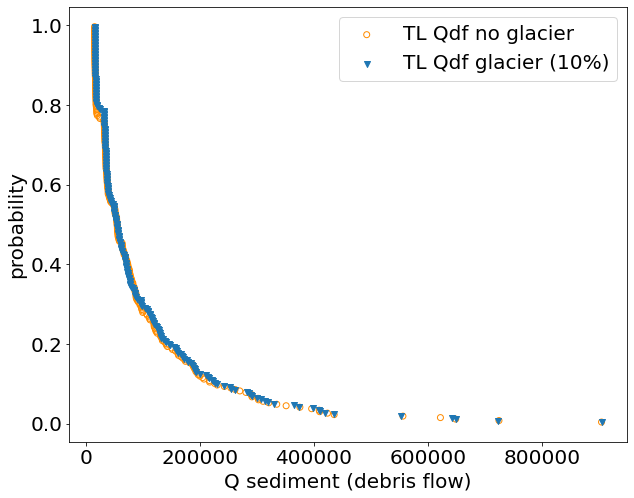

In [91]:
# 1. TL glaciers vs no glaciers

fontsize = 20

fig, ax = plt.subplots(figsize=(10, 8))

# # transport limited - df
ax.scatter(x=Sed_tl_MF.Qdftl.values, y=Sed_tl_MF.prob.values,facecolors='none', edgecolor = 'darkorange',label = 'TL Qdf no glacier')
ax.scatter(x=Sed_tl_gl_MF.Qdftl.values, y=Sed_tl_gl_MF.prob.values, marker = 'v', label = 'TL Qdf glacier (10%)')

# # # transport limited - Qs
# ax.scatter(x=Sed_tl_sed_MF.Qdftl.values, y=Sed_tl_sed_MF.prob.values, label = 'Qs no glacier')
# ax.scatter(x=Sed_tl_gl_sed_MF.Qdftl.values, y=Sed_tl_gl_sed_MF.prob.values, label = 'Qs glacier')


# # supply limited no glacier
# # ax.scatter(x=Sed_percent25_MF.Qdftl.values, y=Sed_percent25_MF.prob.values, label = 'Sed_percent25_MF')
# ax.scatter(x=Sed_percent50_MF.Qdftl.values, y=Sed_percent50_MF.prob.values,facecolors='none', edgecolor ='forestgreen', label = '50 %, w/o glacier')
# ax.scatter(x=Sed_percent75_MF.Qdftl.values, y=Sed_percent75_MF.prob.values, facecolors='none', edgecolor ='darkred',label = '75 %, w/o glacier')

# # # # supply limited with glacier 
# # # ax.scatter(x=Sed_percent25_gl_MF.Qdftl.values, y=Sed_percent25_gl_MF.prob.values, label = 'Sed_percent25_gl_MF')
# ax.scatter(x=Sed_percent50_gl_MF.Qdftl.values, y=Sed_percent50_gl_MF.prob.values, marker = 'v', label = '50 %, w/ glacier')
# ax.scatter(x=Sed_percent75_gl_MF.Qdftl.values, y=Sed_percent75_gl_MF.prob.values, marker = 'v', label = '75 %, w/ glacier')


plt.legend(fontsize=fontsize)

# ax.set_xscale('log')
# ax.set_yscale('log')

plt.xlabel('Q sediment (debris flow)', fontsize=fontsize)  # Setting label and fontsize for x-axis
plt.ylabel('probability', fontsize=fontsize)  # Setting label and fontsize for y-axis
plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Set size of major ticks on both axes

# plt.savefig('MF1.png', dpi = 300)

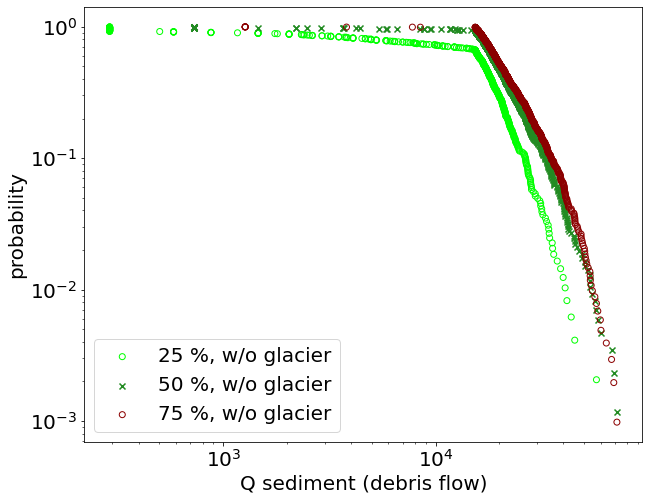

In [48]:
# 2. SL no glaciers 

# 2. SL no glaciers 

fontsize = 20

fig, ax = plt.subplots(figsize=(10, 8))

# TL
# ax.scatter(x=Sed_tl_MF.Qdftl.values, y=Sed_tl_MF.prob.values,facecolors='none', edgecolor = 'darkorange',label = 'TL Qdf no glacier')
# ax.scatter(x=Sed_tl_gl_MF.Qdftl.values, y=Sed_tl_gl_MF.prob.values, marker = 'v', label = 'TL Qdf glacier (10%)')



# # supply limited no glacier
ax.scatter(x=Sed_percent25_MF.Q100.values, y=Sed_percent25_MF.prob.values, facecolors='none', edgecolor ='lime', label = '25 %, w/o glacier')
ax.scatter(x=Sed_percent50_MF.Q100.values, y=Sed_percent50_MF.prob.values, marker= 'x', color ='forestgreen', label = '50 %, w/o glacier')
ax.scatter(x=Sed_percent75_MF.Q100.values, y=Sed_percent75_MF.prob.values, facecolors='none', edgecolor ='darkred',label = '75 %, w/o glacier')

# # # # supply limited with glacier 
# ax.scatter(x=Sed_percent25_gl_MF.Q100.values, y=Sed_percent25_gl_MF.prob.values, marker = 'v', label = 'Sed_percent25_gl_MF')
# ax.scatter(x=Sed_percent50_gl_MF.Q100.values, y=Sed_percent50_gl_MF.prob.values, marker = 'v', label = '50 %, w/ glacier')
# ax.scatter(x=Sed_percent75_gl_MF.Q100.values, y=Sed_percent75_gl_MF.prob.values, marker = 'v', label = '75 %, w/ glacier')


plt.legend(fontsize=fontsize)

ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel('Q sediment (debris flow)', fontsize=fontsize)  # Setting label and fontsize for x-axis
plt.ylabel('probability', fontsize=fontsize)  # Setting label and fontsize for y-axis
plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Set size of major ticks on both axes

# plt.savefig('MF1.png', dpi = 300)








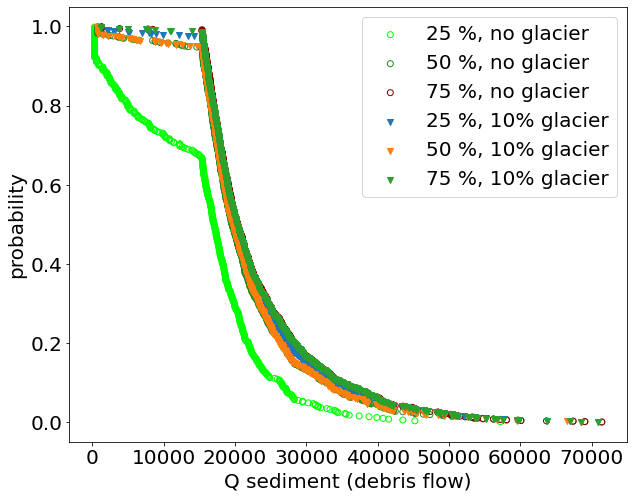

In [49]:
# 2. SL no glaciers 

fontsize = 20

fig, ax = plt.subplots(figsize=(10, 8))

# # TL
# ax.scatter(x=Sed_tl_MF.Qdftl.values, y=Sed_tl_MF.prob.values,facecolors='none', edgecolor = 'darkorange',label = 'TL Qdf no glacier')
# ax.scatter(x=Sed_tl_gl_MF.Qdftl.values, y=Sed_tl_gl_MF.prob.values, marker = 'v', label = 'TL Qdf glacier (10%)')



# # supply limited no glacier
ax.scatter(x=Sed_percent25_MF.Q100.values, y=Sed_percent25_MF.prob.values, facecolors='none', edgecolor ='lime', label = '25 %, no glacier')
ax.scatter(x=Sed_percent50_MF.Q100.values, y=Sed_percent50_MF.prob.values,facecolors='none', edgecolor ='forestgreen', label = '50 %, no glacier')
ax.scatter(x=Sed_percent75_MF.Q100.values, y=Sed_percent75_MF.prob.values, facecolors='none', edgecolor ='darkred',label = '75 %, no glacier')

# # # supply limited with glacier 
ax.scatter(x=Sed_percent25_gl_MF.Q100.values, y=Sed_percent25_gl_MF.prob.values, marker = 'v', label = '25 %, 10% glacier')
ax.scatter(x=Sed_percent50_gl_MF.Q100.values, y=Sed_percent50_gl_MF.prob.values, marker = 'v', label = '50 %, 10% glacier')
ax.scatter(x=Sed_percent75_gl_MF.Q100.values, y=Sed_percent75_gl_MF.prob.values, marker = 'v', label = '75 %, 10% glacier')


plt.legend(fontsize=fontsize)

# ax.set_xscale('log')
# ax.set_yscale('log')

plt.xlabel('Q sediment (debris flow)', fontsize=fontsize)  # Setting label and fontsize for x-axis
plt.ylabel('probability', fontsize=fontsize)  # Setting label and fontsize for y-axis
plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Set size of major ticks on both axes

# plt.savefig('MF1.png', dpi = 300)





# time series plots 

In [50]:
# path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/'

columns = ['D', 'Q100', 'sc', 'Qstl', 'Qdftl']
ts1 = 420960
ts2 = 467520



# transport limited 
Sed_tl = pd.read_csv(pathTL + 'default_land_cover/cellnr12a/Sediment.out')[columns].set_index('D')
Sed_tl_gl = pd.read_csv(pathTL + '10percent_glacier/cellnr12a/Sediment.out')[columns].set_index('D')


# supply limited - default 
Sed_mean      = pd.read_csv(pathSL + 'default_land_cover/1default_land_cover_mean_annual/cellnr14b/Sediment.out')[columns].set_index('D')
Sed_percent25 = pd.read_csv(pathSL + 'default_land_cover/2default_land_cover_25percent/cellnr14b/Sediment.out')[columns].set_index('D')
Sed_percent50 = pd.read_csv(pathSL + 'default_land_cover/3default_land_cover_50percent/cellnr14b/Sediment.out')[columns].set_index('D')
Sed_percent75 = pd.read_csv(pathSL + 'default_land_cover/4default_land_cover_75percent/cellnr14b/Sediment.out')[columns].set_index('D')


# supply limited - 10% glacier 
Sed_mean_gl      = pd.read_csv(pathSL + '10percent_glacier/110percent_glacier_mean_annual/cellnr14b/Sediment.out')[columns].set_index('D')
Sed_percent25_gl = pd.read_csv(pathSL + '10percent_glacier/210percent_glacier_25percent/cellnr14b/Sediment.out')[columns].set_index('D')
Sed_percent50_gl = pd.read_csv(pathSL + '10percent_glacier/310percent_glacier_50percent/cellnr14b/Sediment.out')[columns].set_index('D')
Sed_percent75_gl = pd.read_csv(pathSL + '10percent_glacier/410percent_glacier_75percent/cellnr14b/Sediment.out')[columns].set_index('D')




<AxesSubplot:xlabel='D'>

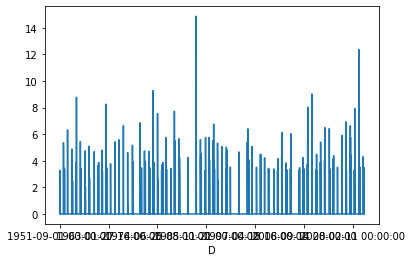

In [51]:
Sed_percent50.Q100.plot()



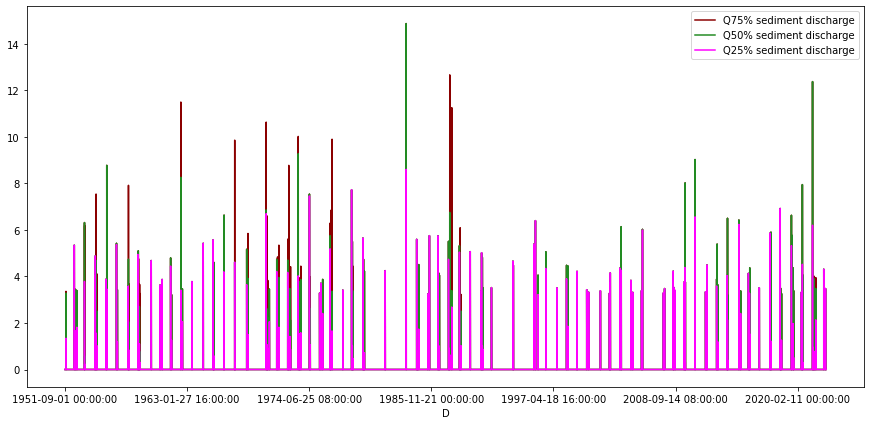

In [52]:


fig, ax = plt.subplots(figsize=(15, 7))

# Sed_mean.Q100.plot(label = 'mean annual', color = 'orange')
Sed_percent75.Q100.plot(label = 'Q75% sediment discharge', color = 'darkred')
Sed_percent50.Q100.plot(label = 'Q50% sediment discharge', color = 'forestgreen')
Sed_percent25.Q100.plot(label = 'Q25% sediment discharge', color = 'magenta')

plt.legend()
# ax.set_ylim((4,6))

Text(0.5, 1.0, 'sediment storage (different values as daily sediment input')

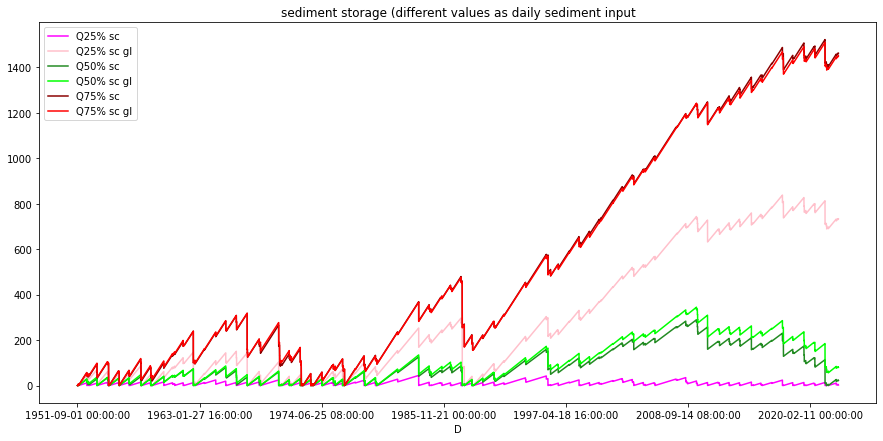

In [53]:
fig, ax = plt.subplots(figsize=(15, 7))


# Sed_mean.sc.plot(label = 'mean annual', color = 'orange')
# Sed_mean_gl.sc.plot(label = 'mean annual gl')

Sed_percent25.sc.plot(label = 'Q25% sc', color = 'magenta')
Sed_percent25_gl.sc.plot(label = 'Q25% sc gl', color = 'pink')

Sed_percent50.sc.plot(label = 'Q50% sc', color = 'forestgreen')
Sed_percent50_gl.sc.plot(label = 'Q50% sc gl', color = 'lime')

Sed_percent75.sc.plot(label = 'Q75% sc', color = 'darkred')
Sed_percent75_gl.sc.plot(label = 'Q75% sc gl', color = 'red')



plt.legend()
plt.title('sediment storage (different values as daily sediment input')
# ax.set_ylim((4,6))

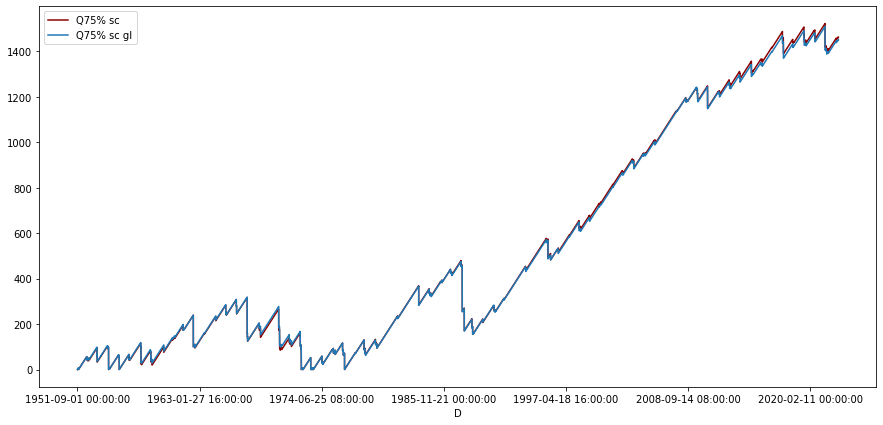

In [54]:
fig, ax = plt.subplots(figsize=(15, 7))
# mean annual 
# Sed_mean.sc.plot(label = 'mean annual', color = 'orange')
# Sed_mean_gl.sc.plot(label = 'mean annual gl')

# 25% 
# Sed_percent25.sc.plot(label = 'Q25% sc', color = 'magenta')
# Sed_percent25_gl.sc.plot(label = 'Q25% sc gl')

# 50%
# Sed_percent50.sc.plot(label = 'Q50% sc', color = 'forestgreen')
# Sed_percent50_gl.sc.plot(label = 'Q50% sc gl')

# 75%
Sed_percent75.sc.plot(label = 'Q75% sc', color = 'darkred')
Sed_percent75_gl.sc.plot(label = 'Q75% sc gl')


plt.legend()


# time series plots

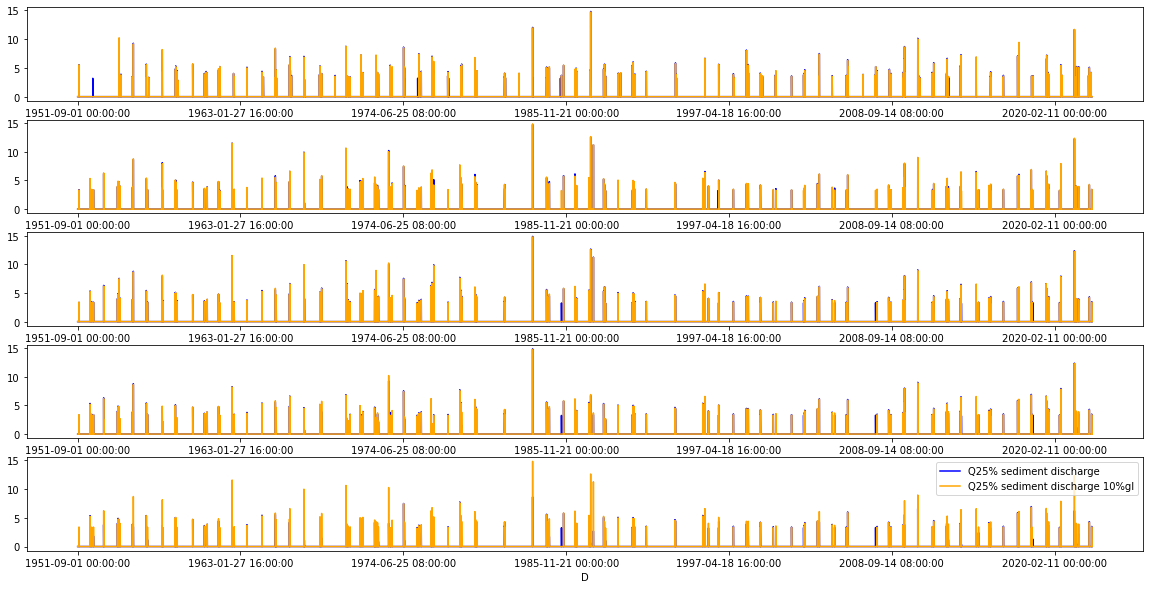

In [55]:
fig = plt.figure(figsize=(20, 10))
mosaic = fig.subplot_mosaic('''
                            fff
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')

Sed_tl.Q100.plot(ax=mosaic['f'], label = 'TL', color = 'blue')
Sed_tl_gl.Q100.plot(ax=mosaic['f'], label = 'TL 10%gl', color = 'orange')
    
Sed_mean_gl.Q100.plot(ax=mosaic['a'], label = 'mean annual gl', color = 'blue')
Sed_mean.Q100.plot(ax=mosaic['a'], label = 'mean annual 10%gl', color = 'orange')

Sed_percent75.Q100.plot(ax=mosaic['b'], label = 'Q75% sediment discharge', color = 'blue')
Sed_percent75_gl.Q100.plot(ax=mosaic['b'], label = 'Q75% sediment discharge 10%gl', color = 'orange')

Sed_percent50.Q100.plot(ax=mosaic['c'], label = 'Q50% sediment discharge', color = 'blue')
Sed_percent50_gl.Q100.plot(ax=mosaic['c'], label = 'Q50% sediment discharge 10% gl', color = 'orange')

Sed_percent25.Q100.plot(ax=mosaic['d'], label = 'Q25% sediment discharge', color = 'blue')
Sed_percent25_gl.Q100.plot(ax=mosaic['d'], label = 'Q25% sediment discharge 10%gl', color = 'orange')


plt.legend()

# mean monthly sediments plots 

In [56]:
# plot boxplots for monthly sediment yeild (units???) 
# - calculate the mean monthly for each timeseries 
# - have a table with (1) elevation, (2) cell id, (3-14) 12 mean monthly values 

# how to make a plot 
# https://www.geeksforgeeks.org/how-to-make-boxplots-with-data-points-using-seaborn-in-python/

In [57]:
# 1. calculate monthly for all the time-series 

In [58]:
%%time

# columns = ['D', 'Q100', 'sc', 'Qstl', 'Qdftl']

column = 'Q100'
print(column)
result_df = pd.DataFrame()

# Define the path to your folders
folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/10percent_glacier'
# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/default_land_cover'

# Iterate over the files in the folders
for folder_name in os.listdir(folder_path):
    # skip dsstore thing
    if folder_name == '.DS_Store':
        continue
    # skip all csvs
    if folder_name.endswith('.csv'):
        continue
    file_path = os.path.join(folder_path, folder_name, 'Sediment.out')
    if os.path.isfile(file_path):
        
        # calculate mean monthly value for given column 
        output_df = functions.calculate_monthly_sediment_yield(pd.read_csv(file_path))
        # take the column 
        name_column = output_df[column]
        # rename the columns 
        column_name = f'{column}_{folder_name}'
        result_df[column_name] = name_column
        result_df.columns = [col[-3:] for col in result_df.columns]

# result_df2 = result_df.transpose()

# result_df.to_csv(folder_path + '/mean_monthly_Q1010.csv', index = False)

Q100
CPU times: user 33.2 s, sys: 1.02 s, total: 34.3 s
Wall time: 34.7 s


In [59]:
# result_df

## read in 

In [60]:
# read elevation 
df = pd.read_csv('/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/10percent_glacier/mean_monthly_Q100.csv', index_col= 0)


## add elevation 

In [61]:
elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_langtang.csv')[['cellnr2','band_data']] 


In [62]:
df = functions.add_elevation(elevation, df)



In [63]:
df1 = functions.data_for_boxplots_sorted(df, 'Qdftl', 'band_data')



Text(0.5, 1.0, 'Qftl: elevation is sorted from low to high')

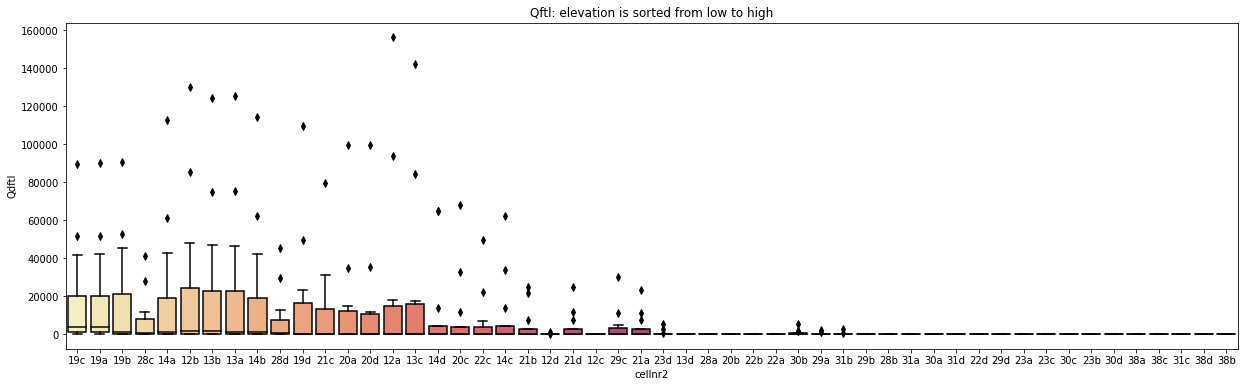

In [64]:

plt.figure(figsize=(21, 6))  # Optional: Set the figure size
boxplots = sns.boxplot(x='cellnr2', y='Qdftl',  data=df1, palette = 'magma_r')#, legend=False)

plt.legend([], [], frameon=False)

# sns.stripplot(x='Q100', y='Q100', data=melted_df, color = 'grey', alpha = 0.7) 

plt.title('Qftl: elevation is sorted from low to high')


In [73]:
df1

,cellnr2,band_data,month,Q100
0,19c,2448.0,0,1151.943917
1,19a,2613.0,0,230.030197
2,19b,3360.0,0,0.000000
3,28c,3421.0,0,0.000000
4,14a,3695.0,0,0.000000
...,...,...,...,...
619,38a,5763.0,11,0.000000
620,38c,5859.0,11,0.000000
621,31c,5870.0,11,0.000000
622,38d,5936.0,11,0.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Q sediments /month [mm]')

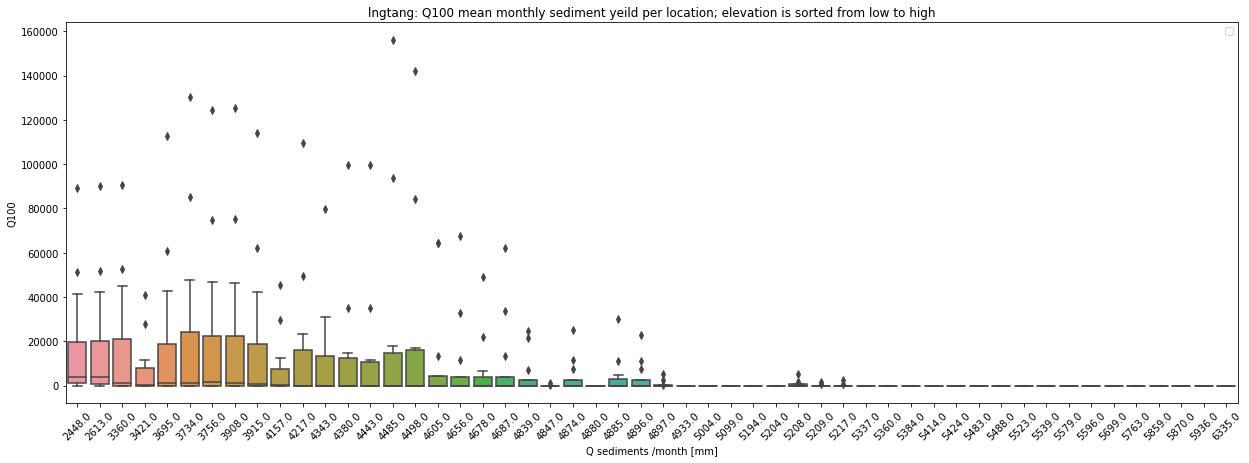

In [78]:
df1 = functions.data_for_boxplots_sorted(df, 'Q100', 'band_data')


plt.figure(figsize=(21, 7))  # Optional: Set the figure size
boxplots = sns.boxplot(x='band_data', y='Q100',  data=df1)#, palette = 'magma_r')#, legend=False)
# 
# scatter = sns.scatterplot(data=df1, x='band_data', y='Q100', hue='month', palette='viridis')#, marker='o')#, markersize = 10)

plt.legend()

plt.xticks(rotation = 45)
plt.title('lngtang: Q100 mean monthly sediment yeild per location; elevation is sorted from low to high')
plt.xlabel('elevation')
plt.xlabel('Q sediments /month [mm]')

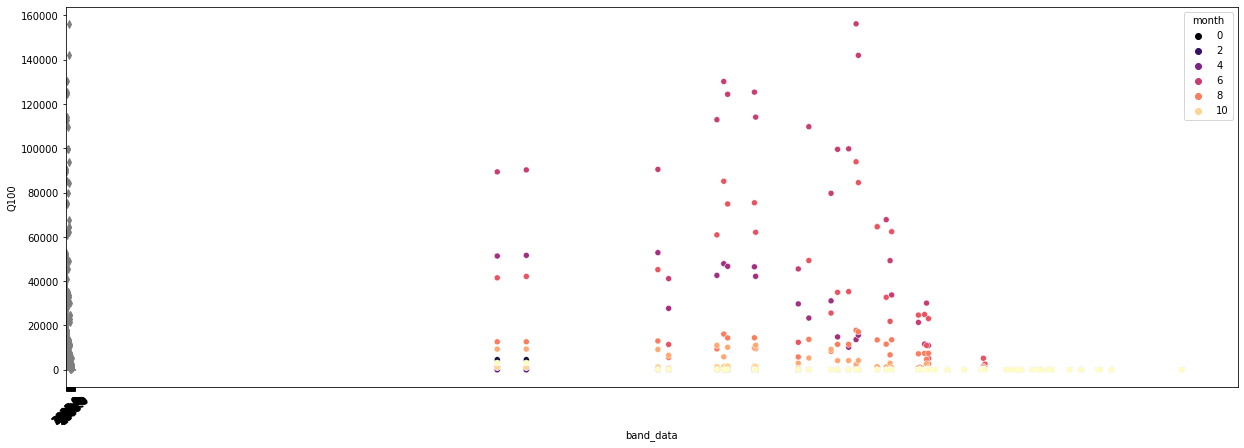

In [105]:

plt.figure(figsize=(21, 7))

# Plot boxplots
boxplots = sns.boxplot(x='band_data', y='Q100', data=df1, color='lightgrey')

# Overlay scatter points
scatter = sns.scatterplot(data=df1, x='band_data', y='Q100', hue='month', palette='magma')#, dodge=True)

plt.xticks(rotation=45)
plt.show()


/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  w

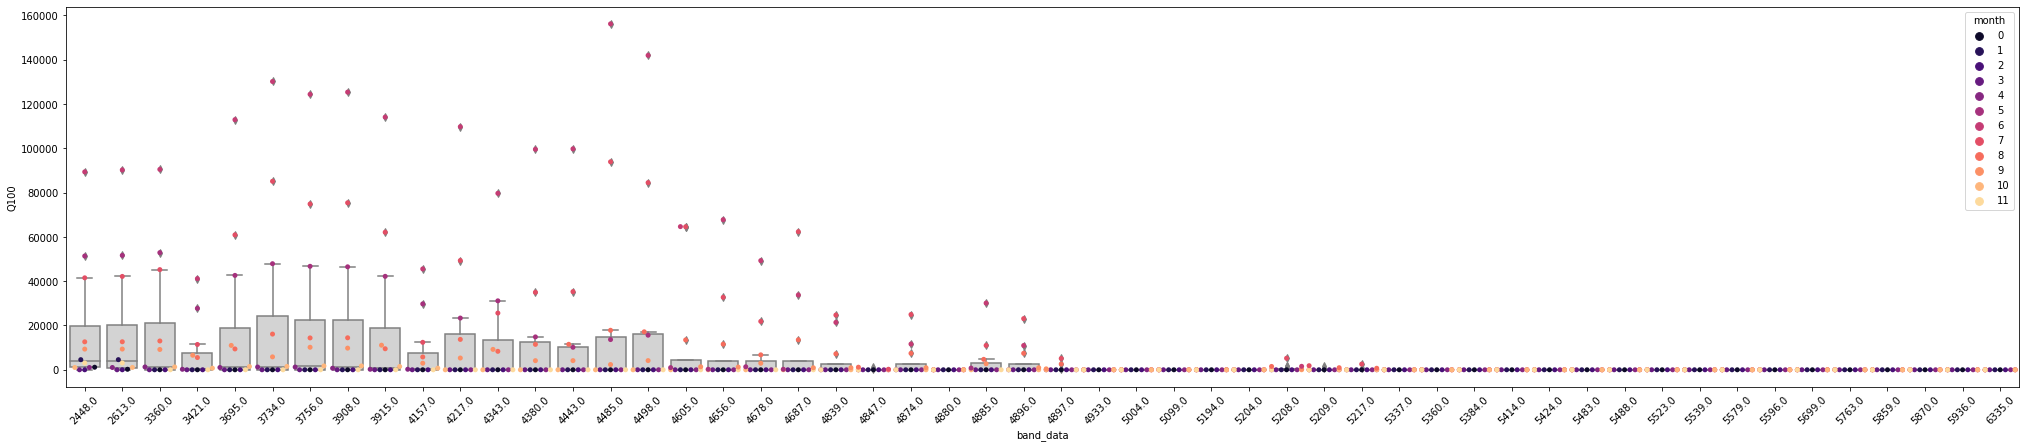

In [123]:
plt.figure(figsize=(35, 7))  # Optional: Set the figure size

boxplots = sns.boxplot(x='band_data', y='Q100', data=df1, color='lightgrey')
scatter = sns.swarmplot(data=df1, x='band_data', y='Q100', hue='month', palette='magma')#, marker='x')#, markersize = 10)


plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'mean monthly Q100, sed; 10% glacier cover')

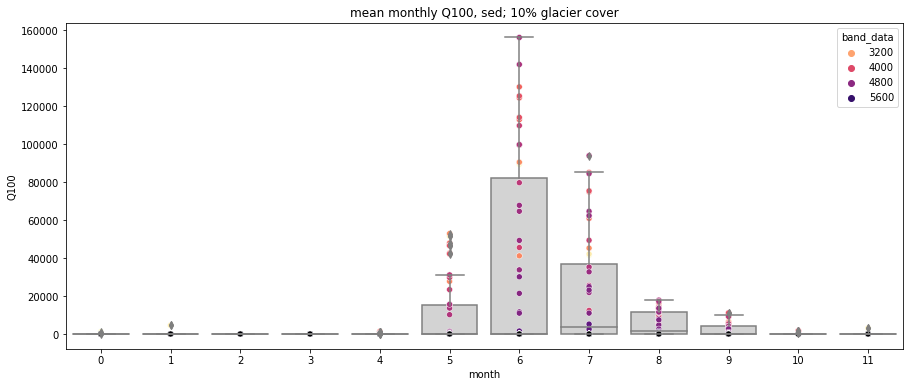

In [81]:

plt.figure(figsize=(15, 6))  # Optional: Set the figure size
boxplots = sns.boxplot(x='month', y='Q100',  data=df1, color = 'lightgrey')#, palette = 'magma_r')#, legend=False)

palette = plt.cm.magma_r

scatter = sns.scatterplot(data=df1, x='month', y='Q100', hue='band_data', palette=palette)#, marker='o')#, markersize = 10)

plt.title('mean monthly Q100, sed; 10% glacier cover')

Text(0.5, 1.0, 'mean monthly Q100 (no zeros), sed; 10% glacier cover')

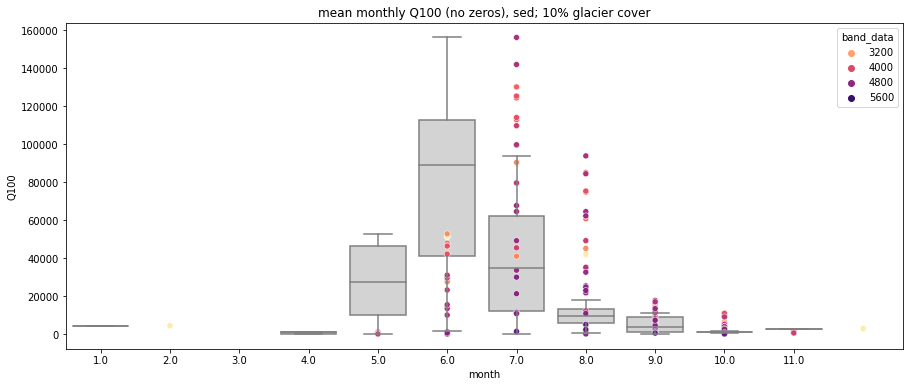

In [114]:
df_nozero = df1.replace(0,  np.nan)


palette = plt.cm.magma_r

plt.figure(figsize=(15, 6))  # Optional: Set the figure size
boxplots = sns.boxplot(x='month', y='Q100',  data=df_nozero, color='lightgrey')#, legend=False)
# violinplots = sns.violinplot(x='month', y='Q100',  data=df_nozero, color='lightgrey')#, legend=False)

scatter = sns.scatterplot(data=df_nozero, x='month', y='Q100', hue='band_data', palette=palette)#, marker='o')#, markersize = 10)

plt.title('mean monthly Q100 (no zeros), sed; 10% glacier cover')

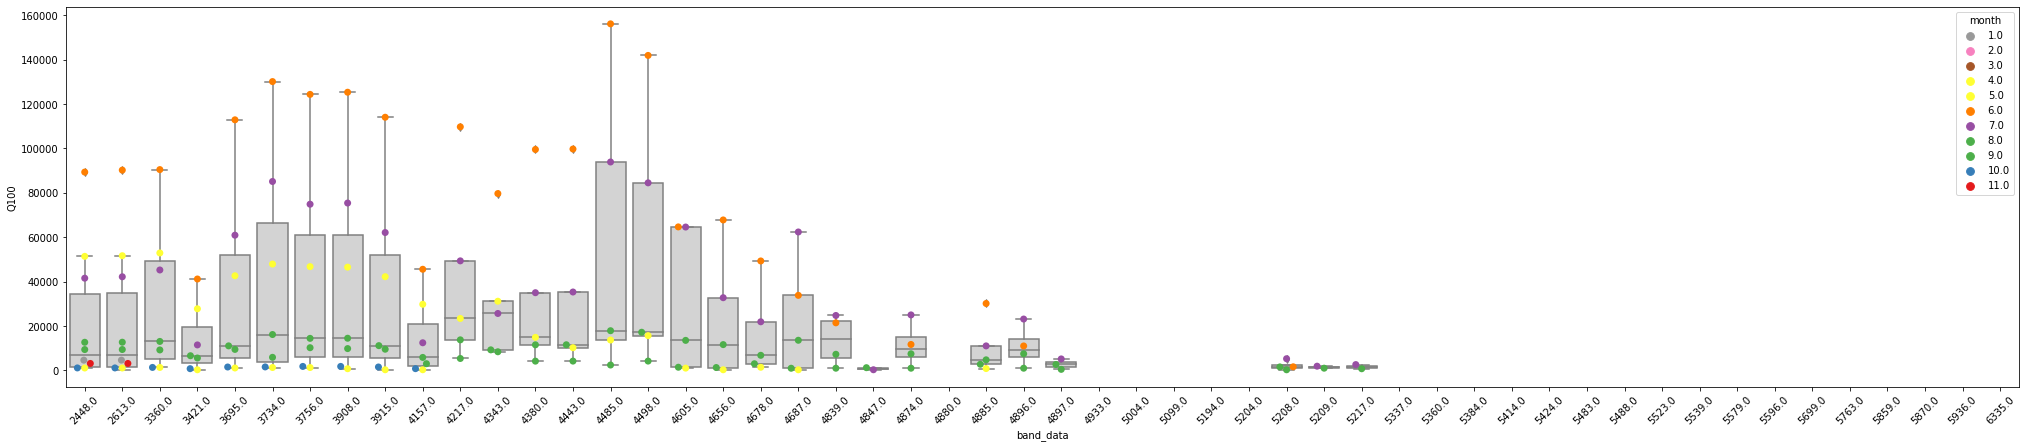

In [129]:
plt.figure(figsize=(35, 7))  # Optional: Set the figure size

boxplots = sns.boxplot(x='band_data', y='Q100', data=df_nozero, color='lightgrey')
scatter = sns.swarmplot(data=df_nozero, x='band_data', y='Q100', hue='month', palette='Set1_r', s = 7)#, marker='x')#, markersize = 10)


plt.xticks(rotation=45)
plt.show()

# together - Q100 

In [131]:
# df1.month.unique()

# add elevation 

In [ ]:
transposed = transposed.reset_index()

In [ ]:
transposed = transposed.rename(columns ={'index':'cellnr2'})

In [ ]:
# transposed

In [ ]:
# read elevation info

elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_langtang.csv')[['cellnr2','band_data']] 

# merge together 

merged = transposed.merge(elevation, on = 'cellnr2')


In [ ]:
# merged = merged.set_index(['cellnr2', 'band_data'])

In [ ]:
merged.head()

In [ ]:
melted_df = pd.melt(merged, id_vars=['cellnr2', 'band_data'], var_name='month', value_name='Q100')


In [ ]:
melted_df['Q100'] = melted_df['Q100'].replace(0,  np.nan)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(data=melted_df, x='month', y='Q100')#, hue='band_data')

# Swarm plot
# sns.swarmplot(data=melted_df, x='month', y='Q100', hue='band_data', dodge=True, alpha=0.7)
# sns.swarmplot(data=melted_df, x='month', y='Q100', hue='band_data', dodge=True, alpha=0.7)

plt.title('mean monthly Q100, no zeros')

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='month', y='Q100',hue = 'band_data', color='lightgrey')#, boxprops=dict(edgecolor='black'))

palette = plt.cm.magma_r

scatter = sns.scatterplot(data=melted_df, x='month', y='Q100', hue='band_data', palette=palette)#, marker='o')#, markersize = 10)

# # colorbar
# colorbar = scatter.get_children()[1]
# colorbar.set_label('Elevation')
# colorbar.set_ticks(melted_df['band_data'].unique())




